In [89]:
import pandas as pd
import numpy as np
import networkx as nx

# create a "members" dataset
memberships = pd.read_csv('data\\memberships.csv', parse_dates=['joined','visited'])
members = memberships[['member_id', 'name', 'hometown', 'city','state', 'lat', 'lon']].groupby('member_id').first()

# read in group information and trim down to only groups with edges
groups = pd.read_csv('data\\groups.csv', index_col='group_id')
groups = groups.loc[memberships.group_id.unique()]

# Read in Event Data
rsvps = pd.read_csv('data/rsvps.csv')
events = pd.read_csv('data/events.csv', index_col='event_id')

In [13]:
pynash_info = groups.loc[groups.group_name == 'PyNash'].iloc[0]

In [14]:
pynash_events = events.loc[events.group_urlname == 'PyNash']
pynash_events

,name,status,time,yes_rsvp_count,group_urlname
event_id,,,,,
244222379,"An October Two-fer: Refactoring, Extra Code In...",past,2017-10-26 23:00:00,40,PyNash
cldxflywnbgb,PyNash Lunch!,past,2017-10-04 16:00:00,19,PyNash
243161760,Creating Better Beer Through Data Science,past,2017-09-28 23:00:00,69,PyNash
cldxflywmbjb,PyNash Lunch!,past,2017-09-06 16:00:00,15,PyNash
242470062,You and I and the PyNash API,past,2017-08-24 23:00:00,59,PyNash
cldxflywlbdb,PyNash Lunch!,past,2017-08-02 16:00:00,14,PyNash
241094967,PyNash x Penny U: An Evening of Learning,past,2017-07-27 23:00:00,83,PyNash
cldxflywkbhb,PyNash Lunch!,past,2017-07-05 16:00:00,16,PyNash
240786082,"Interactive Python Environments: IPython, Jupy...",past,2017-06-22 23:00:00,53,PyNash


In [23]:
lunch_rsvps = rsvps.loc[rsvps.event_id == 'cldxflywnbgb']
lunch_rsvps.set_index('member_id').join(members)[['name', 'city']]

,name,city
member_id,,
237869773,Alaric Reinhard,Nashville
53439252,Avi,Hendersonville
127214502,Bryan P Marlowe,Smyrna
156626172,Dan Burger,Nashville
234179814,Didi Hill,Nashville
43237102,Hameed Gifford,Nashville
30123762,Jason Myers,Nashville
111917572,Joey Kirby,Nashville
191186119,Kadu,Nashville


In [30]:
g = nx.from_edgelist([(s.member_id, s.event_id) for ind, s in lunch_rsvps.iterrows()])

In [35]:
[x for x in g.edges()]

[(237869773, 'cldxflywnbgb'),
 ('cldxflywnbgb', 53439252),
 ('cldxflywnbgb', 127214502),
 ('cldxflywnbgb', 156626172),
 ('cldxflywnbgb', 234179814),
 ('cldxflywnbgb', 43237102),
 ('cldxflywnbgb', 30123762),
 ('cldxflywnbgb', 111917572),
 ('cldxflywnbgb', 191186119),
 ('cldxflywnbgb', 236998384),
 ('cldxflywnbgb', 237645407),
 ('cldxflywnbgb', 184389351),
 ('cldxflywnbgb', 183564319),
 ('cldxflywnbgb', 204129504),
 ('cldxflywnbgb', 182591120),
 ('cldxflywnbgb', 232676485),
 ('cldxflywnbgb', 2896514),
 ('cldxflywnbgb', 230753190),
 ('cldxflywnbgb', 2069)]

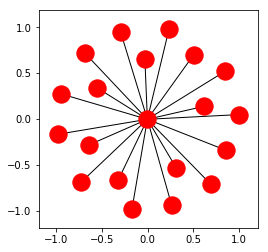

In [45]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1)

nx.draw_networkx(g, with_labels=False)

ax.set_aspect(1)
plt.show()

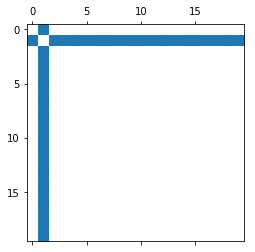

In [57]:
plt.spy(nx.adj_matrix(g), %%cmd)
plt.show()

In [58]:
list_of_pynash_events = pynash_events.index

In [60]:
pynash_rsvps = rsvps.loc[rsvps.event_id.isin(list_of_pynash_events)]

In [63]:
pynash_rsvps

,group_urlname,event_id,member_id
74350,PyNash,244222379,208425479
74351,PyNash,244222379,126309962
74352,PyNash,244222379,230516487
74353,PyNash,244222379,53439252
74354,PyNash,244222379,184117514
74355,PyNash,244222379,38665162
74356,PyNash,244222379,127214502
74357,PyNash,244222379,205937561
74358,PyNash,244222379,57907252
74359,PyNash,244222379,4393825


In [64]:
g = nx.from_pandas_dataframe(pynash_rsvps, source='member_id', target='event_id')

In [69]:
nx.is_bipartite(g)

True

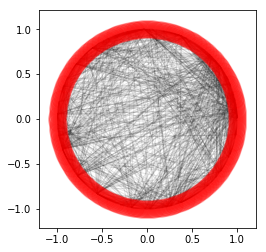

In [72]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1)

pos = nx.circular_layout(g)
nx.draw_networkx(g, pos, with_labels=False, alpha=0.1)

ax.set_aspect(1)
plt.show()

In [95]:
m, e = nx.bipartite.sets(g)

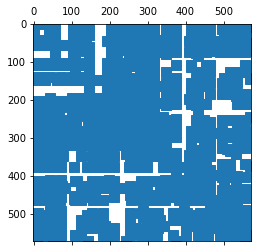

In [79]:
plt.spy(nx.adj_matrix(g))
plt.show()

In [93]:
members.loc[202882025]

name        Chris Jarvis
hometown             NaN
city           Nashville
state                 TN
lat                36.16
lon               -86.79
Name: 184547023, dtype: object

In [98]:
[members.loc[x, 'name'] for u, x in sorted([(g.degree[x], x) for x in m])[-10:]]

['Brian Pitts',
 'Trey Brooks',
 'Alex Simonian',
 'Aliya Gifford',
 'Bill Israel',
 'Michael mead',
 'Chris Jarvis',
 'Jason Myers',
 'Chad Upjohn',
 'Greg Back']

In [101]:
mg = nx.bipartite.weighted_projected_graph(g, m, ratio=False)

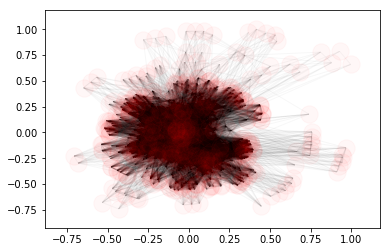

In [108]:
nx.draw_networkx(mg, with_labels=False, alpha=0.03)
plt.show()

2069          4
42506         4
1939496       3
2896514      15
3246917       3
3438546      13
3661197       2
4169858       2
4393825      13
4413235       1
5351550       1
5739749       1
5783863       3
7217653       1
7222138       3
7333165       6
7606093       1
7658930       2
7670958       1
7712083       1
7752299       2
7813939       1
7981818      14
8228323       1
8688363       2
8731661      10
9005384       1
9363105       1
9852711      11
9917104       1
             ..
230516487     1
230753190     1
230754445     1
230914457     3
231254596     1
231297477     6
231553070     1
231779693     1
232105953     4
232300966     1
232311841     1
232376470     1
232477169     1
232676485     5
232740190     1
233601566     1
234109593     1
234179814     1
234324964     1
234719094     2
234785133     1
234800842     1
236438111     1
236998384     1
237110939     1
237392126     1
237642878     1
237645407     1
237869773     1
239680203     1
dtype: int64

In [195]:
df_members = pd.DataFrame(index=[n for n in mg.nodes()])
df_members['num_events'] = pd.Series(dict(nx.degree(g, mg.nodes())))
df_members['degree'] = pd.Series(dict(nx.degree(mg)))
df_members['clustering_coefficient'] = pd.Series(nx.clustering(mg))
df_members['betweenness_centrality'] = pd.Series(nx.betweenness_centrality(mg))

In [190]:
df_members.join(members.name).sort_values(by='betweenness_centrality', ascending=False)

,degree,clustering_coefficient,betweenness_centrality,name
121334792,403,0.224732,0.055124,Greg Back
57907252,459,0.203471,0.053080,Chad Upjohn
30123762,237,0.237753,0.040602,Jason Myers
2896514,331,0.245372,0.037175,Trey Brooks
184547023,347,0.264380,0.031768,Chris Jarvis
12140530,378,0.249323,0.028138,Bill Israel
202882025,396,0.246465,0.027081,Michael mead
13606604,343,0.263362,0.021315,Alex Simonian
126309962,348,0.269618,0.020821,Aliya Gifford
4393825,316,0.292104,0.019495,Chris Fonnesbeck


In [228]:
df_members.sort_values(by='degree', ascending=False)

,num_events,degree,clustering_coefficient,betweenness_centrality
57907252,25,459,0.203471,0.053080
121334792,27,403,0.224732,0.055124
202882025,16,396,0.246465,0.027081
12140530,16,378,0.249323,0.028138
126309962,15,348,0.269618,0.020821
184547023,19,347,0.264380,0.031768
55029192,13,347,0.282254,0.017495
13606604,15,343,0.263362,0.021315
205937561,12,341,0.290081,0.016537
2896514,15,331,0.245372,0.037175


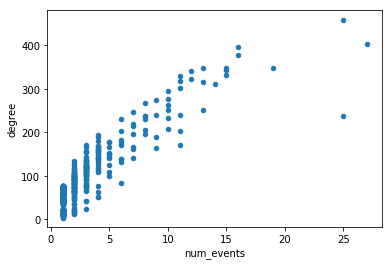

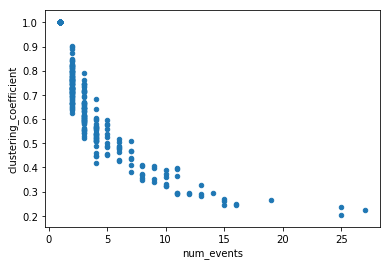

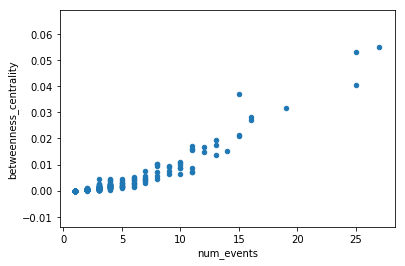

In [197]:
df_members.plot.scatter('num_events', 'degree')#betweenness_centrality')
df_members.plot.scatter('num_events', 'clustering_coefficient')#betweenness_centrality')
df_members.plot.scatter('num_events', 'betweenness_centrality')
plt.show()

In [198]:
nx.spring_layout?

In [203]:
nx.spring_layout?

In [212]:
df_

[75,
 70,
 82,
 65,
 52,
 100,
 231,
 38,
 73,
 121,
 22,
 121,
 75,
 111,
 459,
 10,
 76,
 102,
 49,
 77,
 70,
 80,
 14,
 14,
 47,
 75,
 63,
 237,
 13,
 138,
 106,
 51,
 22,
 99,
 39,
 38,
 15,
 58,
 13,
 75,
 13,
 49,
 144,
 14,
 70,
 76,
 75,
 106,
 151,
 58,
 42,
 77,
 55,
 151,
 7,
 10,
 32,
 75,
 8,
 47,
 13,
 122,
 157,
 65,
 65,
 156,
 150,
 86,
 23,
 166,
 38,
 86,
 46,
 73,
 135,
 64,
 75,
 197,
 75,
 38,
 75,
 16,
 51,
 7,
 55,
 46,
 73,
 117,
 65,
 55,
 70,
 65,
 206,
 181,
 76,
 60,
 119,
 24,
 49,
 38,
 13,
 275,
 119,
 42,
 122,
 171,
 75,
 51,
 38,
 136,
 144,
 46,
 121,
 63,
 196,
 70,
 177,
 95,
 119,
 13,
 162,
 16,
 81,
 38,
 76,
 16,
 17,
 75,
 60,
 58,
 43,
 38,
 75,
 93,
 204,
 83,
 162,
 13,
 126,
 104,
 88,
 70,
 75,
 42,
 38,
 189,
 58,
 10,
 65,
 75,
 96,
 65,
 268,
 70,
 20,
 84,
 98,
 49,
 46,
 331,
 104,
 46,
 141,
 65,
 55,
 60,
 24,
 89,
 13,
 23,
 140,
 183,
 24,
 38,
 60,
 18,
 138,
 51,
 21,
 51,
 80,
 22,
 70,
 124,
 76,
 101,
 48,
 296,
 312,
 60,
 

In [216]:
nx.draw_networkx?

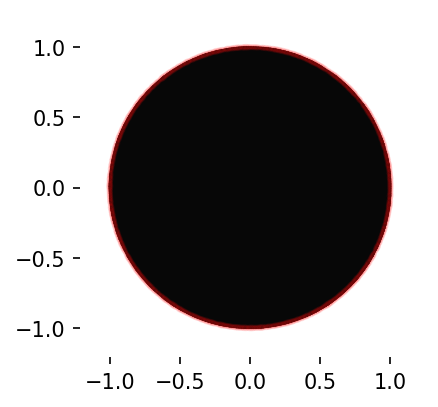

In [219]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1, figsize=(3,3), dpi=150)

node_sizes = [np.log(mg.degree[n]) for n in mg.nodes()]

pos = nx.circular_layout(mg)
nx.draw_networkx(mg, pos, with_labels=False, 
                 node_size=node_sizes, edge_alpha=0.001, 
                 alpha=0.1, ax=ax)

ax.set_aspect(1)
ax.set_frame_on(False)
plt.show()



In [121]:
adj_mat = nx.to_numpy_matrix(mg)
sorted(adj_mat.sum(axis=1))

[matrix([[ 4.]]),
 matrix([[ 4.]]),
 matrix([[ 5.]]),
 matrix([[ 7.]]),
 matrix([[ 7.]]),
 matrix([[ 8.]]),
 matrix([[ 8.]]),
 matrix([[ 9.]]),
 matrix([[ 10.]]),
 matrix([[ 10.]]),
 matrix([[ 10.]]),
 matrix([[ 10.]]),
 matrix([[ 10.]]),
 matrix([[ 10.]]),
 matrix([[ 10.]]),
 matrix([[ 10.]]),
 matrix([[ 11.]]),
 matrix([[ 11.]]),
 matrix([[ 13.]]),
 matrix([[ 13.]]),
 matrix([[ 13.]]),
 matrix([[ 13.]]),
 matrix([[ 13.]]),
 matrix([[ 13.]]),
 matrix([[ 13.]]),
 matrix([[ 13.]]),
 matrix([[ 13.]]),
 matrix([[ 13.]]),
 matrix([[ 13.]]),
 matrix([[ 13.]]),
 matrix([[ 14.]]),
 matrix([[ 14.]]),
 matrix([[ 14.]]),
 matrix([[ 14.]]),
 matrix([[ 14.]]),
 matrix([[ 14.]]),
 matrix([[ 16.]]),
 matrix([[ 16.]]),
 matrix([[ 16.]]),
 matrix([[ 16.]]),
 matrix([[ 16.]]),
 matrix([[ 16.]]),
 matrix([[ 17.]]),
 matrix([[ 17.]]),
 matrix([[ 17.]]),
 matrix([[ 17.]]),
 matrix([[ 18.]]),
 matrix([[ 18.]]),
 matrix([[ 18.]]),
 matrix([[ 18.]]),
 matrix([[ 18.]]),
 matrix([[ 18.]]),
 matrix([[ 20.]]),
 

In [226]:
members.loc[189887587]

name          Stephen
hometown          NaN
city        Nashville
state              TN
lat             36.15
lon            -86.86
Name: 189887587, dtype: object

In [227]:
df_members.loc[189887587]

num_events                  3.000000
degree                    143.000000
clustering_coefficient      0.577662
betweenness_centrality      0.001396
Name: 189887587, dtype: float64

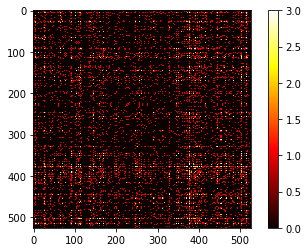

In [119]:
plt.imshow(, cmap='hot', vmax=3)
plt.colorbar()
plt.show()

In [238]:
from networkx.algorithms import community

comp = community.girvan_newman(mg)

In [240]:
tuple(sorted(c) for c in next(comp))

([2069,
  42506,
  1939496,
  2896514,
  3246917,
  3438546,
  3661197,
  4169858,
  4393825,
  4413235,
  5351550,
  5739749,
  5783863,
  7217653,
  7222138,
  7333165,
  7606093,
  7658930,
  7670958,
  7712083,
  7752299,
  7813939,
  7981818,
  8228323,
  8688363,
  8731661,
  9005384,
  9363105,
  9852711,
  9917104,
  9946829,
  10085652,
  10223251,
  10309794,
  10853675,
  11028407,
  11288886,
  11804293,
  11832553,
  11872972,
  12074359,
  12140530,
  12248783,
  12541555,
  12579661,
  12625982,
  12853877,
  13141514,
  13214587,
  13606604,
  13812470,
  14020645,
  14219098,
  14403986,
  14466241,
  14568344,
  14589429,
  14593999,
  15360711,
  15529121,
  19147021,
  20105041,
  21990171,
  23229581,
  23897412,
  25228452,
  25691792,
  26576702,
  27531452,
  30123762,
  30145882,
  32007512,
  32214442,
  33016112,
  33828812,
  34208282,
  34817302,
  35949012,
  35949052,
  36925522,
  38584482,
  38665162,
  38852502,
  39926142,
  40152352,
  43237102,
  44